# Haar Cascades | OpenCV (II)

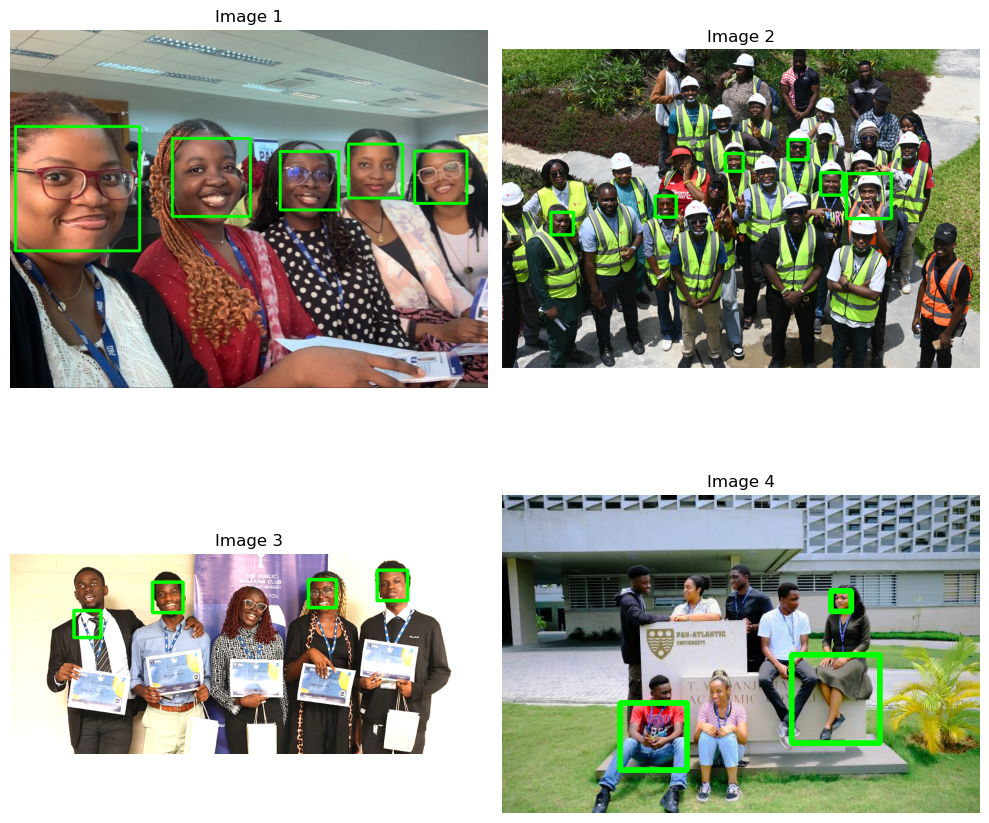

In [1]:
import cv2
from matplotlib import pyplot as plt

# Function to perform face detection and draw rectangles
def detect_and_draw(image, face_cascade):
    
    # OpenCV opens images as BRG but we want it as RGB we'll also need a grayscale version
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    found = face_cascade.detectMultiScale(img_gray, minSize=(20, 20))
    
    # Don't do anything if there's no sign
    amount_found = len(found)

    if amount_found != 0:

        # There may be more than one sign in the image
        for (x, y, width, height) in found:
            # We draw a green rectangle around every recognized sign
            cv2.rectangle(img_rgb, (x, y), (x + height, y + width), (0, 255, 0), 5)

    return img_rgb

# Load the pre-trained Haar Cascade face detection model
face_data = cv2.CascadeClassifier('C:/Users/Francis/anaconda3/Library/etc/haarcascades/haarcascade_frontalface_default.xml')

# List of image paths
image_paths = [
    "../images/exercise-images/friends.jpg",
    "../images/exercise-images/lake.jpg",
    "../images/exercise-images/debate.jpg",
    "../images/exercise-images/pan.jpg"
]

# Create subplots for each image
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, image_path in enumerate(image_paths):
    # Load the image
    img = cv2.imread(image_path)
    
    # Perform face detection and draw rectangles
    img_with_detections = detect_and_draw(img, face_data)
    
    # Display the image with detections in the corresponding subplot
    ax = axs[i // 2, i % 2]  # Calculate the position in the subplot grid
    ax.imshow(img_with_detections)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
